# Basic RAG

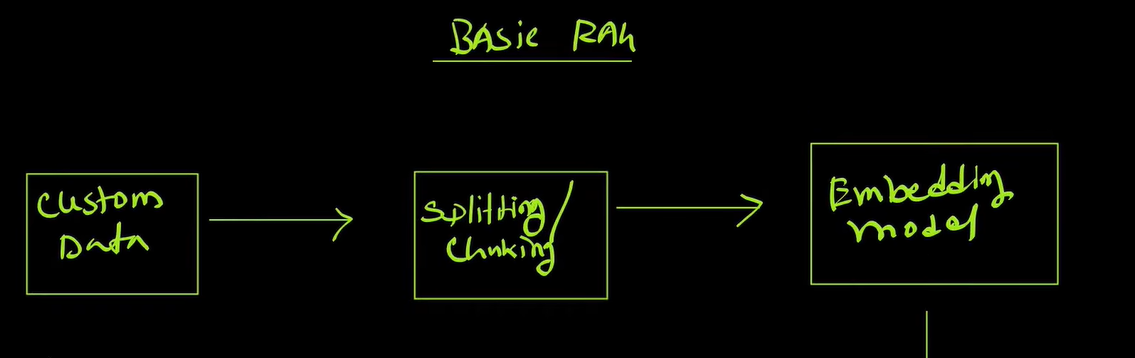

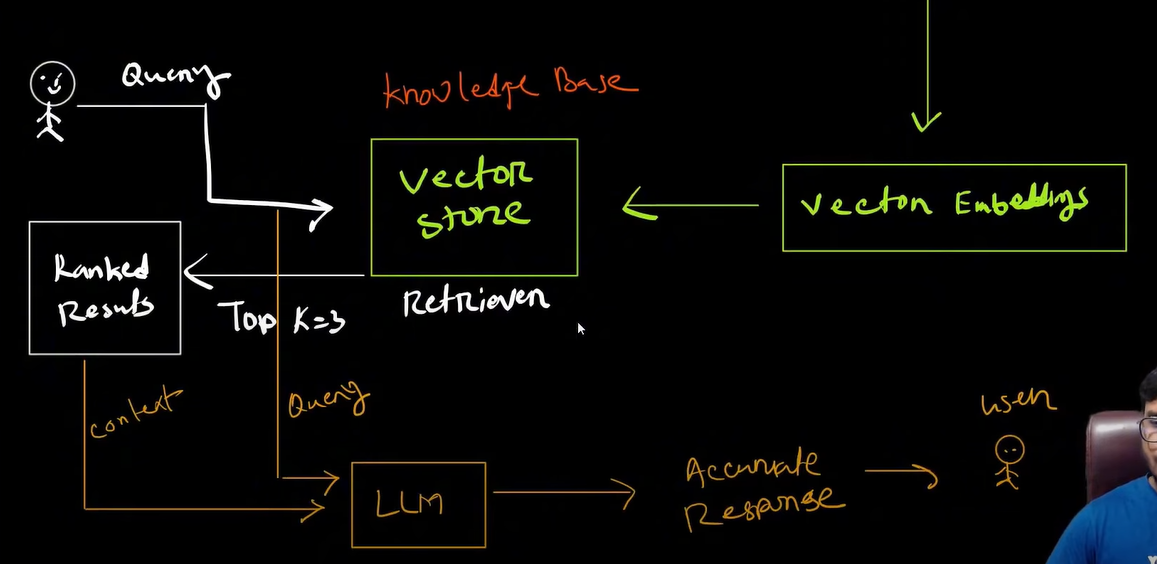

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
openai_api_key = os.environ["OPENAI_API_KEY"]

In [3]:
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.document_loaders import TextLoader

In [4]:
loader = TextLoader("./data/state_of_the_union.txt")
loaded_document = loader.load()

In [5]:
loaded_document

[Document(metadata={'source': './data/state_of_the_union.txt'}, page_content='Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny. \n\nSix days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. \n\nHe met the Ukrainian people. \n\nFrom President Zelenskyy to every Ukrainian, their fearlessness, their courage, their d

In [6]:
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
chunks_of_text = text_splitter.split_documents(loaded_document)

In [8]:
len(chunks_of_text)

42

In [9]:
embeddings = OpenAIEmbeddings()

vector_db = FAISS.from_documents(chunks_of_text, embeddings)

In [10]:
vector_db

In [11]:
retriever = vector_db.as_retriever()

In [12]:
response = retriever.invoke("what did he say about ketanji brown jackson?")

In [13]:
response

[Document(metadata={'source': './data/state_of_the_union.txt'}, page_content='Tonight. I call on the Senate to: Pass the Freedom to Vote Act. Pass the John Lewis Voting Rights Act. And while you’re at it, pass the Disclose Act so Americans can know who is funding our elections. \n\nTonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service. \n\nOne of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. \n\nAnd I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.'),
 Document(metadata={'source': './data/state_of_the_union.txt'}, page_content='A former top litigator in private practice. A f

In [14]:
len(response)

4

In [15]:
retriever = vector_db.as_retriever(search_kwargs={"k": 3})

In [16]:
response = retriever.invoke("what did he say about ketanji brown jackson?")

In [17]:
response

[Document(metadata={'source': './data/state_of_the_union.txt'}, page_content='Tonight. I call on the Senate to: Pass the Freedom to Vote Act. Pass the John Lewis Voting Rights Act. And while you’re at it, pass the Disclose Act so Americans can know who is funding our elections. \n\nTonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service. \n\nOne of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. \n\nAnd I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Breyer’s legacy of excellence.'),
 Document(metadata={'source': './data/state_of_the_union.txt'}, page_content='A former top litigator in private practice. A f

## Simple use with LCEL

In [18]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

In [19]:
template = """Answer the question based only on the following context:

{context}

Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)

model = ChatOpenAI()


In [20]:
def format_docs(docs):
    return "\n\n".join([d.page_content for d in docs])


chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)


In [21]:
response = chain.invoke("what did he say about ketanji brown jackson?")

In [22]:
response

"He mentioned that he nominated Circuit Court of Appeals Judge Ketanji Brown Jackson four days ago, describing her as one of the nation's top legal minds who will continue Justice Breyer's legacy of excellence. He also mentioned that she is a former top litigator in private practice, a former federal public defender, and comes from a family of public school educators and police officers. Additionally, he noted that since her nomination, she has received a broad range of support from various groups, including the Fraternal Order of Police and former judges appointed by Democrats and Republicans."

In [23]:
type(response)

str